<a href="https://colab.research.google.com/github/aloy4646/Neural-Language-Modeling/blob/main/Neural_Language_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Akhir - Neural Language Modeling

1120052 - Sean Patrik<br>
1120053 - Aloysius

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from pickle import dump
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from pickle import load
from keras.models import load_model
from keras.utils import pad_sequences

## Data Prepraration

### Data Loading

In [2]:
def load_doc(filename):
  file = open(filename, 'r')
  text = file.read()
  file.close()
  return text

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
raw_text = load_doc('/content/drive/MyDrive/rhyme/rhyme.txt')
print(raw_text)

Sing a song of sixpence,
A pocket full of rye.
Four and twenty blackbirds,
Baked in a pie.

When the pie was opened
The birds began to sing;
Wasn't that a dainty dish,
To set before the king.

The king was in his counting house,
Counting out his money;
The queen was in the parlour,
Eating bread and honey.

The maid was in the garden,
Hanging out the clothes,
When down came a blackbird
And pecked off her nose.


### Membersihkan teks

melakukan split text dan memisahkan setiap kata dengan spasi

In [6]:
tokens = raw_text.split()
raw_text = ' '.join(tokens)

In [7]:
raw_text

"Sing a song of sixpence, A pocket full of rye. Four and twenty blackbirds, Baked in a pie. When the pie was opened The birds began to sing; Wasn't that a dainty dish, To set before the king. The king was in his counting house, Counting out his money; The queen was in the parlour, Eating bread and honey. The maid was in the garden, Hanging out the clothes, When down came a blackbird And pecked off her nose."

### Membuat sequences

Setiap sequences berisi 10 karakter input + 1 karakter output

In [8]:
length = 10
sequences = list()
for i in range(length, len(raw_text)):
  seq = raw_text[i-length:i+1]
  sequences.append(seq)
print('Total Sequences: %d' % len(sequences))

Total Sequences: 399


##### Print beberapa isi sequences

In [9]:
sequences[:10]

['Sing a song',
 'ing a song ',
 'ng a song o',
 'g a song of',
 ' a song of ',
 'a song of s',
 ' song of si',
 'song of six',
 'ong of sixp',
 'ng of sixpe']

### Menyimpan Sequences

In [10]:
def save_doc(lines, filename):
  data = '\n'.join(lines)
  file = open(filename, 'w')
  file.write(data)
  file.close()

In [11]:
out_filename = '/content/drive/MyDrive/rhyme/char_sequences.txt'
save_doc(sequences, out_filename)

## Training Language Model

### Load sequence text

In [12]:
in_filename = '/content/drive/MyDrive/rhyme/char_sequences.txt'
sequence_text = load_doc(in_filename)
sequence_text_lines = sequence_text.split('\n')

In [13]:
sequence_text_lines[:10]

['Sing a song',
 'ing a song ',
 'ng a song o',
 'g a song of',
 ' a song of ',
 'a song of s',
 ' song of si',
 'song of six',
 'ong of sixp',
 'ng of sixpe']

### Encode sequence text

merubah kalimat menjadi bilangan integer

In [14]:
chars = sorted(list(set(sequence_text)))
mapping = dict((c, i) for i, c in enumerate(chars))

sequences = list()
for line in sequence_text_lines:
  encoded_seq = [mapping[char] for char in line]
  sequences.append(encoded_seq)

vocab_size = len(mapping)
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 38


### Memisahkan karakter input dan output

Karakter terakhir pada satu sequences merupakan karakter output

In [15]:
sequences = array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]

# sequences = array(sequences)
# X, y = sequences[:,:-1], sequences[:,-1]

#### one hot encode

In [16]:
sequences = [to_categorical(x, num_classes=vocab_size) for x in X]
X = array(sequences)
y = to_categorical(y, num_classes=vocab_size)

### Define model

In [17]:
def define_model(X):
  model = Sequential()
  model.add(LSTM(75, input_shape=(X.shape[1], X.shape[2])))
  model.add(Dense(vocab_size, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model

In [18]:
model = define_model(X)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 75)                34200     
                                                                 
 dense (Dense)               (None, 38)                2888      
                                                                 
Total params: 37,088
Trainable params: 37,088
Non-trainable params: 0
_________________________________________________________________


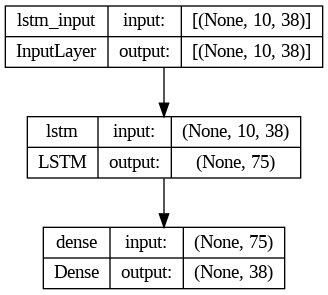

In [19]:
plot_model(model, show_shapes=True)

### Fit model

In [20]:
hist = model.fit(X, y, epochs=100, verbose=2)

Epoch 1/100
13/13 - 9s - loss: 3.6009 - accuracy: 0.1378 - 9s/epoch - 655ms/step
Epoch 2/100
13/13 - 0s - loss: 3.4317 - accuracy: 0.1905 - 76ms/epoch - 6ms/step
Epoch 3/100
13/13 - 0s - loss: 3.1447 - accuracy: 0.1905 - 74ms/epoch - 6ms/step
Epoch 4/100
13/13 - 0s - loss: 3.0555 - accuracy: 0.1905 - 74ms/epoch - 6ms/step
Epoch 5/100
13/13 - 0s - loss: 3.0103 - accuracy: 0.1905 - 72ms/epoch - 6ms/step
Epoch 6/100
13/13 - 0s - loss: 2.9885 - accuracy: 0.1905 - 71ms/epoch - 5ms/step
Epoch 7/100
13/13 - 0s - loss: 2.9694 - accuracy: 0.1905 - 90ms/epoch - 7ms/step
Epoch 8/100
13/13 - 0s - loss: 2.9552 - accuracy: 0.1905 - 72ms/epoch - 6ms/step
Epoch 9/100
13/13 - 0s - loss: 2.9369 - accuracy: 0.1905 - 74ms/epoch - 6ms/step
Epoch 10/100
13/13 - 0s - loss: 2.9153 - accuracy: 0.1905 - 122ms/epoch - 9ms/step
Epoch 11/100
13/13 - 0s - loss: 2.8929 - accuracy: 0.1905 - 83ms/epoch - 6ms/step
Epoch 12/100
13/13 - 0s - loss: 2.8712 - accuracy: 0.2180 - 86ms/epoch - 7ms/step
Epoch 13/100
13/13 - 0s 

In [21]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

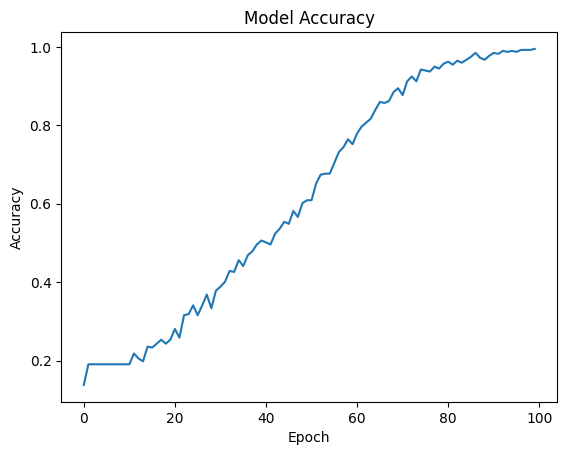

In [24]:
plt.plot(hist.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

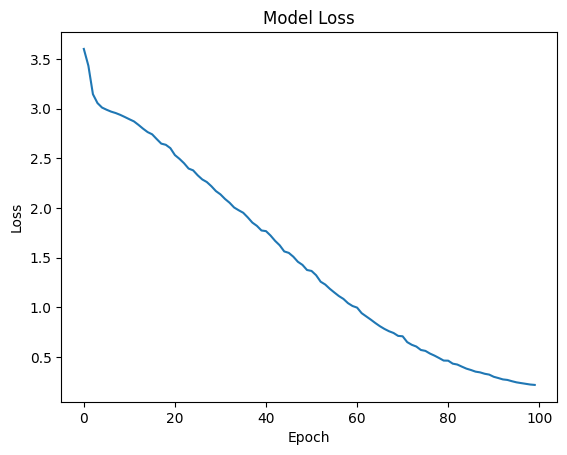

In [23]:
plt.plot(hist.history['loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [25]:
model.save('/content/drive/MyDrive/rhyme/model.h5')

menyimpan mapping dari karakter ke integer untuk encode kalimat input

In [26]:
dump(mapping, open('/content/drive/MyDrive/rhyme/mapping.pkl', 'wb'))

## Test model untuk generate text

In [27]:
model = load_model('/content/drive/MyDrive/rhyme/model.h5')
mapping = load(open('/content/drive/MyDrive/rhyme/mapping.pkl', 'rb'))

In [28]:
def generate_seq(model, mapping, seq_length, seed_text, n_chars):
  in_text = seed_text
  
  for _ in range(n_chars):
    encoded = [mapping[char] for char in in_text]
    encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
    encoded = to_categorical(encoded, num_classes=len(mapping))

    # reshape tidak sesuai dengan yang dibuku karena terjadi error
    encoded = encoded.reshape(1, encoded.shape[1], vocab_size)
    
    yhat_probability = model.predict(encoded, verbose=0)
    yhat = np.argmax(yhat_probability, axis=-1)

    # merubah integer to character
    out_char = ''
    for char, index in mapping.items():
      if index == yhat:
        out_char = char
        break

    in_text += out_char
  return in_text

### Test dengan kalimat dari rhyme

In [29]:
print(generate_seq(model, mapping, 10, 'Sing a son', 20))

Sing a song of sixpence, A poc


In [30]:
print(generate_seq(model, mapping, 10, 'king was i', 20))

king was in his counting house


In [31]:
print(generate_seq(model, mapping, 10, 'When the pie', 20))

When the pie was opened The bird


In [32]:
print(generate_seq(model, mapping, 10, "is counting", 20))

is counting house, Counting out


In [33]:
print(generate_seq(model, mapping, 10, "before the", 20))

before the king. The king was 


### Test dengan kalimat bukan dari rhyme

In [34]:
print(generate_seq(model, mapping, 10, 'hello worl', 20))

hello worl  hee aon weng oae i


In [35]:
print(generate_seq(model, mapping, 10, 'good mor', 20))

good morsexpo a t hee  taee.


In [36]:
print(generate_seq(model, mapping, 10, 'welco', 20))

welco h  hen .oue  ae tie


## Kesimpulan

Model bekerja sangat baik untuk memprediksi karakter/kalimat selanjutnya dari kata-kata/kalimat input yang berasal dari text rhyme. Namun, jika kalimat input tidak berasal dari text rhyme, model kesulitan untuk memprediksi kalimat selanjutnya.

Hasil analisis kami yaitu model overfiting dan sulit mengerti data-data baru diluar text yang dipakai saat training. Hal ini disebabkan oleh data training yang terlalu sedikit dan kurang bervariasi. Selain itu data teks yang digunakan merupakan sebuah lagu yang liriknya kurang bisa merepresentasikan bahasa manusia sehari-hari. Contohnya kalimat "When the pie was opened, The birds began to sing. Wasn't that a dainty dish,
To set before the king." merupakan kalimat kiasan yang dijadikan lirik lagu hanya agar menyesuaikan rima dan bukan kalimat yang digunakan manusia sehari-hari.